<a href="https://colab.research.google.com/github/Harshu0425/Expi1/blob/main/ExpNo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Read Data Set

In [ ]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("##################### Shape #####################")

print(df.shape)
print("##################### Types #####################")
print(df.dtypes)
print("##################### NA #####################")
print(df.isnull().sum())
print("##################### Quantiles #####################")
print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### NA #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Quantiles #####################
                            0.00      0.05      0.50       0.95       0.99  \
Pregnancies                0.000   0.00000    3.0000   10.00000   13.00000   
Glucose      

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# analysis for categorical, ordinal ,Numerical and Cardinal columns

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "0"] # Indent this line
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "0"] # Indent this line

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "0"] # Indent this line

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "0"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    # report
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}') # the number of categorical variables
    print(f'num_cols: {len(num_cols)}') # the number of numerical variables
    print(f'cat_but_car: {len(cat_but_car)}') # the number of cardinal variables
    print(f'num_but_cat: {len(num_but_cat)}') # the number of categorical variables that looks numerical
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [ ]:
print("Categorical columns:",cat_cols)
print("Numerical columns:", num_cols)
print("Cardinal columns:", cat_but_car)

Categorical columns: ['Outcome']
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Cardinal columns: []


In [ ]:
# Outliers identification

<Axes: xlabel='Insulin'>

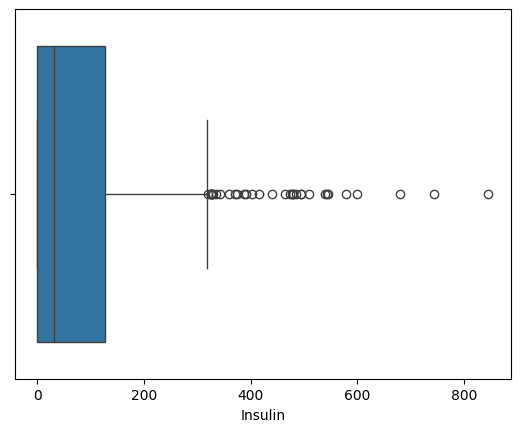

In [ ]:
sns.boxplot(x=df["Insulin"])

<Axes: xlabel='SkinThickness'>

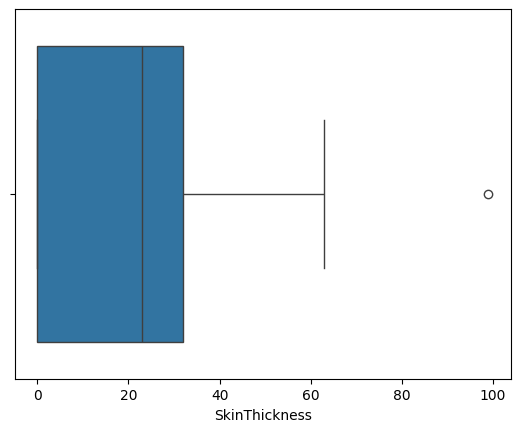

In [ ]:
sns.boxplot(x=df["SkinThickness"])

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    # Indent the code block within the function
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
for i in df.columns:
    # Indent the print statement to include it in the for loop
    print("Thresholds of {} : ({:.2f}, {:.2f})".format(i, *outlier_thresholds(df,i)))

Thresholds of Pregnancies : (-6.50, 13.50)
Thresholds of Glucose : (37.12, 202.12)
Thresholds of BloodPressure : (35.00, 107.00)
Thresholds of SkinThickness : (-48.00, 80.00)
Thresholds of Insulin : (-190.88, 318.12)
Thresholds of BMI : (13.35, 50.55)
Thresholds of DiabetesPedigreeFunction : (-0.33, 1.20)
Thresholds of Age : (-1.50, 66.50)
Thresholds of Outcome : (-1.50, 2.50)


In [ ]:
# Observe the outliers, it can be functioned as well, but we don't need here

low, up = outlier_thresholds(df, "SkinThickness")
outliers = df[((df["SkinThickness"] < low) | (df["SkinThickness"] > up))]
print(outliers)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
579            2      197             70             99        0  34.7   

     DiabetesPedigreeFunction  Age  Outcome  
579                     0.575   62        1  


In [ ]:
# Remove the outliers

dat = df[((df["SkinThickness"] > low) & (df["SkinThickness"] < up))]

<Axes: xlabel='SkinThickness'>

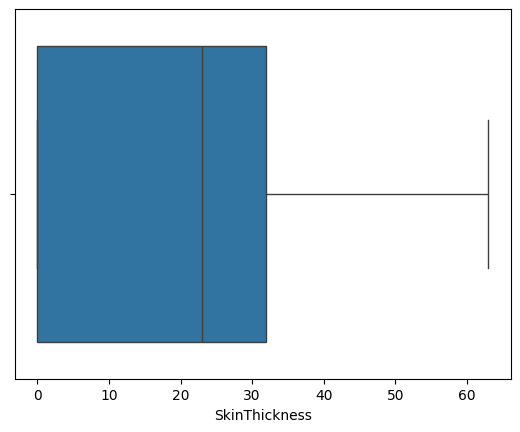

In [ ]:
sns.boxplot(x = "SkinThickness", data = dat)

In [ ]:
# mising value identification and removal

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
num_cols_miss = [i for i in num_cols if i != "Pregnancies"]

for i in num_cols_miss:
    df[i] = df.apply(lambda x: np.nan if x[i] == 0 else x[i], axis=1) # Indent this line

In [ ]:
# df after adding NaN

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30.0,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29.0,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54.0,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df_new = df.copy() # copy dataset to see effect without damage the main dataset

df_new.shape

(768, 9)

In [ ]:
df_new.dropna(inplace=True)

df_new.shape

(392, 9)

In [ ]:
df_fill = df.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

df_fill.head(10) # after filling

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29.0,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54.0,1
